In [2]:
!unzip /content/coil-20-proc.zip

Archive:  /content/coil-20-proc.zip
 extracting: coil-20-proc/obj10__1.png  
 extracting: coil-20-proc/obj10__10.png  
 extracting: coil-20-proc/obj10__11.png  
 extracting: coil-20-proc/obj10__12.png  
 extracting: coil-20-proc/obj10__13.png  
 extracting: coil-20-proc/obj10__14.png  
 extracting: coil-20-proc/obj10__15.png  
 extracting: coil-20-proc/obj10__16.png  
 extracting: coil-20-proc/obj10__17.png  
 extracting: coil-20-proc/obj10__18.png  
 extracting: coil-20-proc/obj10__19.png  
 extracting: coil-20-proc/obj10__2.png  
 extracting: coil-20-proc/obj10__20.png  
 extracting: coil-20-proc/obj10__21.png  
 extracting: coil-20-proc/obj10__22.png  
 extracting: coil-20-proc/obj10__23.png  
 extracting: coil-20-proc/obj10__24.png  
 extracting: coil-20-proc/obj10__25.png  
 extracting: coil-20-proc/obj10__26.png  
 extracting: coil-20-proc/obj10__27.png  
 extracting: coil-20-proc/obj10__28.png  
 extracting: coil-20-proc/obj10__29.png  
 extracting: coil-20-proc/obj10__3.png  
 

In [21]:
import cv2
import os
import random
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline


In [7]:
pwd

'/content'

In [8]:
# ../input/
PATH = os.path.abspath(os.path.join('..', 'content'))

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "coil-20-proc")

# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))



In [9]:
images[0:5]

['/content/coil-20-proc/obj11__41.png',
 '/content/coil-20-proc/obj4__45.png',
 '/content/coil-20-proc/obj19__71.png',
 '/content/coil-20-proc/obj2__67.png',
 '/content/coil-20-proc/obj12__11.png']

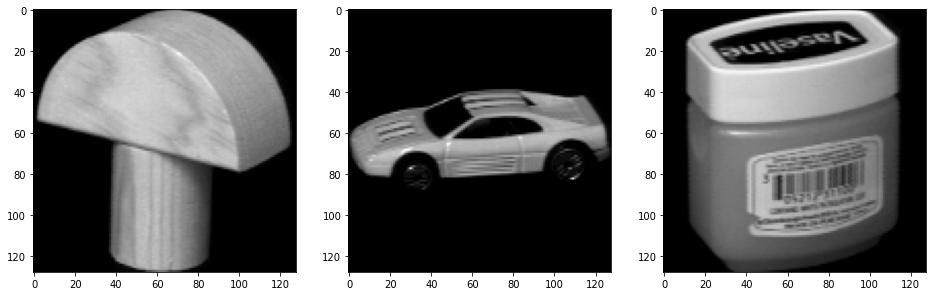

In [23]:
r = random.sample(images, 3)
r

# Matplotlib black magic
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]));    

In [13]:
def proc_images():
   

    x = [] # images as arrays
    
    WIDTH = 36
    HEIGHT = 36

    for img in images:
        base = os.path.basename(img)
        

        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_LINEAR))

        

    return x

In [14]:
x = proc_images()

In [15]:
# Set it up as a dataframe if you like
df = pd.DataFrame()
df["images"]=x

In [16]:
print(len(df), df.images[0].shape)

1440 (36, 36, 3)


In [17]:
np.savez("image", x)

In [19]:
# Load npz file containing image arrays
x_npz = np.load("/content/image.npz")
x = x_npz['arr_0']



In [20]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_valtest = train_test_split(x, test_size=0.2, random_state=1)

In [24]:
print(np.array(X_train).shape)

(1152, 36, 36, 3)


In [25]:
print(np.array(X_valtest).shape)

(288, 36, 36, 3)


In [53]:
288/(1152+288)

0.2

In [26]:
#Get Euclidean Distances between images
l2distance = [np.sqrt(np.sum(np.square(np.subtract(test, train)))) for train in X_train for test in X_valtest]

In [28]:
#Euclidian Distance 
print(l2distance[0:5])

[548.1304589237858, 584.7999658002726, 581.0972379903384, 587.086024360996, 545.9780215356659]


In [27]:
#Euclidian Distance Of First Test Image with all Train Images
print(l2distance [0:1151]) 

[548.1304589237858, 584.7999658002726, 581.0972379903384, 587.086024360996, 545.9780215356659, 539.5859523745962, 592.1334309089464, 544.5144626178445, 548.1824513791006, 542.6103574389269, 519.8692143222178, 581.7293184978732, 576.0468730928065, 508.8369090386428, 545.472272439214, 553.1102964147386, 546.1648102908132, 503.21665314256046, 565.8586395911968, 567.3464549990597, 551.2277206382132, 547.0758631122378, 543.1712437160127, 568.598276465907, 522.7896326439536, 523.9818699153626, 498.01807196124923, 599.0066777591048, 512.3036209124429, 578.8108499328602, 557.8736416071296, 535.6883422289494, 579.2486512716279, 557.9274146338392, 500.04399806417035, 493.94736561702604, 585.6739707379866, 594.6133197297215, 589.2563109547491, 528.5536869609368, 546.3899706253767, 426.077457746828, 489.3434376795095, 527.9857952634711, 539.9555537264155, 513.9815171774176, 541.6087148486442, 505.25142256108495, 529.4638797878473, 586.7307730126314, 508.85164832198393, 577.5292200399907, 570.50503

In [29]:
#Number of Euclidian Distance between Train and Test Images
len(l2distance)

331776

In [30]:
#Minimum euclidian Distance of First test Image to the list of train images
min(l2distance [0:1151])

426.077457746828

In [31]:
#The Position of minimum euclidian distance of first test image to the least of train images
l2distance.index(426.077457746828)

41

In [32]:
df= pd.DataFrame({"distance":l2distance})

In [33]:
#Exporting all euclidian distance in csv 
df.to_csv('distance.csv',index = False)